Once the user has run tkmatrix the results are plotted automatically. However, the user may want to show the results in a different way. Here we show an example. 
We ran first tkmatrix for the TOI-2406 with the user-properties.yaml that is in this folder. Then, we obtained the a_tls_report.csv and a_tls_report.png.

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

we load the a_tls_report.csv file 

In [2]:
df = pd.read_csv('a_tls_report.csv',float_precision='round_trip', sep=',', usecols=['period','radius','found'])

In [11]:
def plot(step_period, step_radius, binning):
    step_period=step_period*binning
    step_radius=step_radius*binning
    min_period = df["period"].min()
    max_period = df["period"].max()
    min_rad = df["radius"].min()
    max_rad = df["radius"].max()
    period_grid = np.arange(min_period, max_period + 0.01, step_period)
    radius_grid = np.arange(min_rad, max_rad + 0.01, step_radius)
    f=len(period_grid)/len(radius_grid)
    bins = [period_grid, radius_grid]
    h1,x,y = np.histogram2d(df['period'][df['found']==1], df['radius'][df['found']==1], bins=bins)
    h2,x,y = np.histogram2d(df['period'][df['found']==0], df['radius'][df['found']==0], bins=bins)
    normed_hist = (100.*h1/(h1+h2))
    fig, ax = plt.subplots(figsize=((f+0.5)*5,5))
    im = plt.imshow(normed_hist.T, origin='lower', extent=(x[0], x[-1], y[0], y[-1]), interpolation='none', aspect='auto', cmap='viridis', vmin=0, vmax=100, rasterized=True)
    plt.colorbar(im, label='Recovery rate (%)')
    plt.xlabel('Injected period (days)')
    plt.ylabel(r'Injected radius (R$_\oplus$)')
    plt.xticks(np.arange(1.0, 11.0, step=1.0))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    plt.savefig('inj-rec'+'_P'+str(step_period)+'_R'+str(step_radius)+'_B'+str(binning)+'.pdf', bbox_inches='tight', dpi=200)

The user only needs to provide with the step_period, step_radius that was used in the user-properties.yaml, and a binning factor to increase the statistics in each pixel  

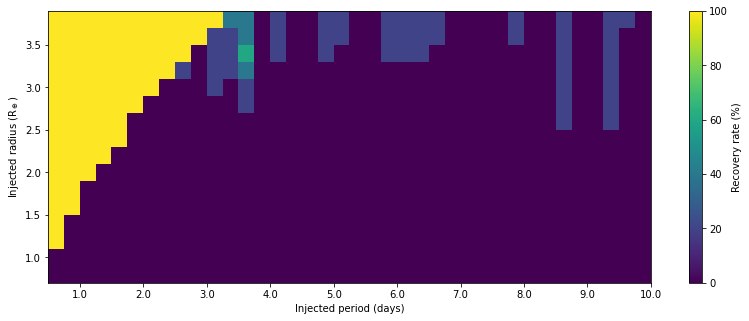

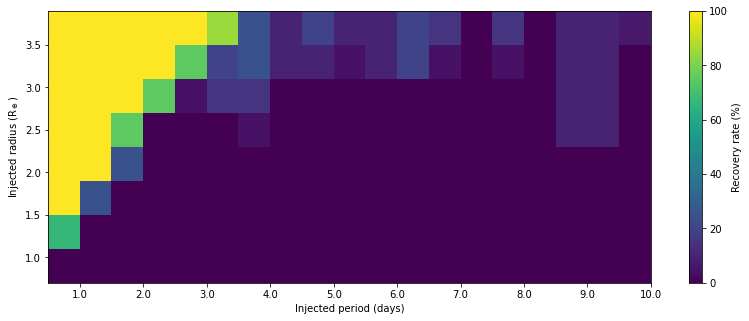

In [13]:
plot(0.25,0.2,1) #with binning 1, that is each pixel correspond to the mean of the number_of_phases used (5 in this case)
plot(0.25,0.2,2) #with binning 2, that is each pixel correspond to the mean of number_of_phases * binning * 2 (20 in this case)